In [82]:
import pandas as pd
from helpers import read_aqi as rd
# read_aqi import all the csv data in a specific folder 
# and concat them to a single pd.Dataframe
# for example, AA=rd.read_aqi("A Path") will import every data in that path
# and then return with a pd.Dataframe, AA

In [98]:
aqi_2014=rd.read_aqi("./EPA_ERDB_2014")
aqi_2015=rd.read_aqi("./EPA_ERDB_2015")
aqi_2016=rd.read_aqi("./EPA_ERDB_2016")
aqi_2017=rd.read_aqi("./EPA_ERDB_2017")

Start importing files from ./EPA_ERDB_2014
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES01.csv
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES03.csv
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES02.csv
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES06.csv
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES05.csv
Reading ./EPA_ERDB_2014/2014_ATM_MD_PSI_AQI_VALUES04.csv
Done importing files from ./EPA_ERDB_2014
Start importing files from ./EPA_ERDB_2015
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES03.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES02.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES01.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES11.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES05.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES04.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES10.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES06.csv
Reading ./EPA_ERDB_2015/2015_ATM_MD_PSI_AQI_VALUES12.csv
Reading ./EPA_ERD

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES12.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES06.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES07.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES13.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES05.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES11.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES10.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES04.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES14.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES01.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES03.csv
Reading ./EPA_ERDB_2016/2016_ATM_MD_PSI_AQI_VALUES02.csv
Done importing files from ./EPA_ERDB_2016
Start importing files from ./EPA_ERDB_2017
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES18.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES19.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES09.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES21.csv
Rea

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES16.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES02.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES14.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES01.csv
Reading ./EPA_ERDB_2017/2017_ATM_MD_PSI_AQI_VALUES15.csv
Done importing files from ./EPA_ERDB_2017


In [18]:
len(aqi_2014)

564474

In [89]:
len(aqi_2015)

1233460

In [90]:
len(aqi_2016)

1402217

In [91]:
len(aqi_2017)

2091464

In [ ]:
list(aqi_2014)

In [99]:
from datetime import datetime, timedelta
# fix time format
def timetodt(TIME):
    try:
        try:
            return datetime.strptime(TIME, '%d-%m月-%y %I.%M.%S.%f000 上午')
        except ValueError:
            return datetime.strptime(TIME, '%d-%m月-%y %I.%M.%S.%f000 下午') + timedelta(hours=12)
    except ValueError:
        try:
            return datetime.strptime(TIME, '%d-%m月 -%y %I.%M.%S.%f000 上午')
        except ValueError:
            return datetime.strptime(TIME, '%d-%m月 -%y %I.%M.%S.%f000 下午') + timedelta(hours=12)
        # print(TIME,"is not a right format",sep=' ')

In [116]:
# takes a like a minute or two to process
# X['unigrams'] = X['text'].apply(lambda a: dmh.tokenize_text(a))
# SO FREAKING FAST
def time_fix(TABLE):
    TABLE['UPDATETIME'] = TABLE['UPDATETIME'].apply(lambda a: timetodt(a))

In [117]:
time_fix_loop(aqi_2014)
time_fix_loop(aqi_2015)
time_fix_loop(aqi_2016)
time_fix_loop(aqi_2017)

In [103]:
import matplotlib.pyplot as plt

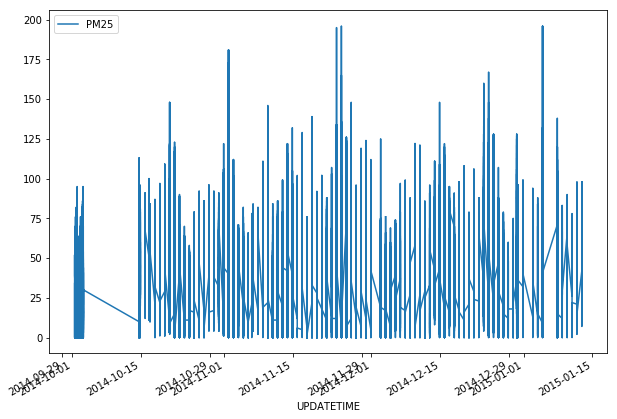

In [104]:
aqi_2014.plot(x='UPDATETIME',y='PM25',figsize=(10,7))

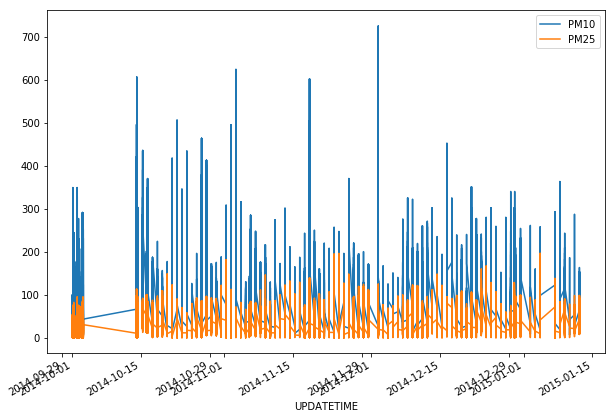

In [18]:
pm_subset=['PSI',
 'POLLUTANT',
 'STATUS',
 'SO2',
 'CO',
 'O3',
 'PM10',
 'PM25',
 'NO2']
aqi_2014.plot(x='UPDATETIME',y=['PM10','PM25'],figsize=(10,7))

In [105]:
#getting aqI from 2014-10-15 to 2014-12-31
aqi_2014_first=aqi_2014[(aqi_2014['UPDATETIME'] < datetime(2015,1,1)) &
         (aqi_2014['UPDATETIME'] > datetime(2014,10,15))]
#geting only taipei data
aqi_2014_first_taipei=aqi_2014_first[aqi_2014_first['COUNTYID'] == 63000]

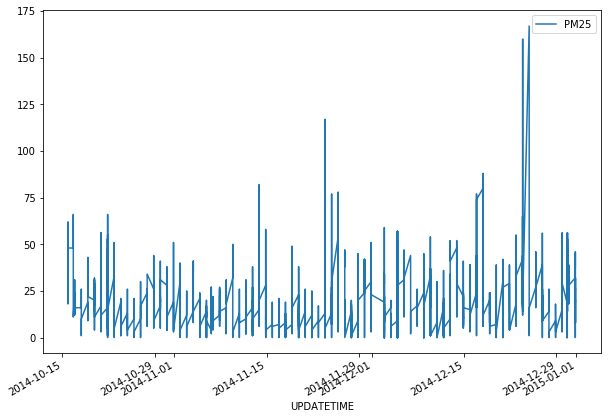

In [106]:
aqi_2014_first_taipei.plot(x='UPDATETIME',y='PM25',figsize=(10,7))

In [111]:
#getting aqI from 2014-10-15 to 2014-12-31
aqi_2017_first=aqi_2017[(aqi_2017['UPDATETIME'] < datetime(2017,2,1)) &
         (aqi_2017['UPDATETIME'] > datetime(2017,1,1))]
#geting only taipei data
aqi_2017_first_taipei=aqi_2017_first[aqi_2017_first['COUNTYID'] == 63000]

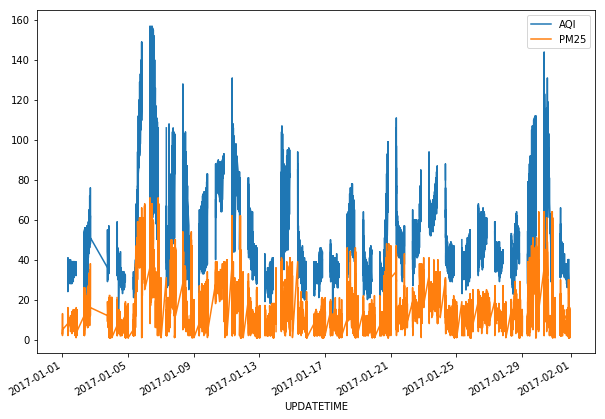

In [114]:
aqi_2017_first_taipei.plot(x='UPDATETIME',y=['AQI','PM25'],figsize=(10,7))